$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 06 - Inductive Data Types

Bor-Yuh Evan Chang  
Thursday, September 12, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

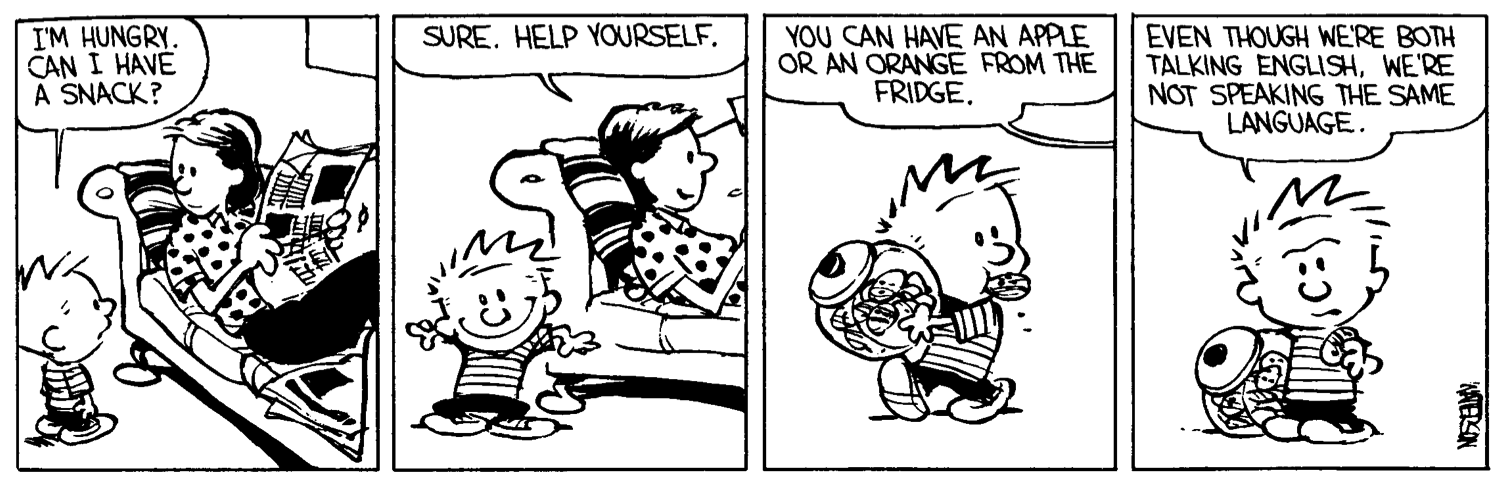

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting06-inductive-data-types.pdf)<br/> [
In-Class Jupyter](in-class/meeting06-inductive-data-types.ipynb)<br/> [
Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/inductive-data-types.html)

## Announcements

-   Lab 1 due this Friday 9/13 6pm
    -   Use GitHub and VS Code: Submit `Lab1.scala`. Just read Jupyter
        notebook or use it for scratch work.
    -   No autograder on Gradescope. Submit via GitHub.
    -   Take advantage of lab section Friday to finish!

## Today

-   [Inductive Data
    Types](https://csci3155.cs.colorado.edu/pppl-course/book/inductive-data-types.html)
-   Triage Your Questions
    -   Lab 1?
-   Revisit and Go Deeper On:
    -   Recursion (Meeting 05)
    -   Data Types (Meeting 04), if time permits
    -   Binding and Scope (Meeting 03), if time permits

## Questions?

-   Review:
    -   What’s *tail recursion*? How does it relate loops?

## Questions?

## MyList

A list is an *inductive data type*:

In [2]:
object MyList {
  sealed trait List[A]
  case class Nil[A]() extends List[A]
  case class ::[A](head: A, tail: List[A]) extends List[A]
}

defined object MyList

The `List` type constructor from Scala library is very close to the
above.

What makes this *inductive*?

Observe that `List[A]` is a recursive type with the `tail` field of
`::`.

## Recursion on Lists

In [3]:
def length[A](l: List[A]): Int = l match {
  case _ => ???
}

defined function length

``` scala
def length[A](l: List[A]): Int = l match {
  case Nil => 0
  case _ :: t => 1 + length(t)
}
length( List(1, 2, 3) )
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">length</span>
<span class="ansi-cyan-fg">res28_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span></pre>

## Without Pattern Matching

In [5]:
def length[A](l: List[A]): Int =
  if (l == Nil) 0
  else 1 + length(l.tail)

defined function length

Could `l.tail` fail?

## Append

In [6]:
def append[A](xl: List[A], yl: List[A]): List[A] = ???

defined function append

Now, we see why `append` (and `:::` in the Scala library) has to be
linear time.

``` scala
def append[A](xl: List[A], yl: List[A]): List[A] = xl match {
  case Nil => yl
  case xh :: xt => xh :: append(xt, yl)
}
val xlyl_append = append(List(1, 2, 3), List(4, 5, 6))
val xlyl_::: = List(1, 2, 3) ::: List(4, 5, 6)
xlyl_append == xlyl_:::
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">append</span>
<span class="ansi-cyan-fg">xlyl_append</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">6</span>)
<span class="ansi-cyan-fg">xlyl_:::</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">6</span>)
<span class="ansi-cyan-fg">res31_3</span>: <span class="ansi-green-fg">Boolean</span> = true</pre>

## Buggy Append

What does `buggyAppend` do?

In [8]:
def buggyAppend[A](xl: List[A], yl: List[A]): List[A] = xl match {
  case Nil => yl
  case xh :: xt => buggyAppend(xt, xh :: yl)
}

defined function buggyAppend

``` scala
val xlyl_buggyAppend = buggyAppend(List(1, 2, 3), List(4, 5, 6))
```

<pre><span class="ansi-cyan-fg">xlyl_buggyAppend</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">6</span>)</pre>

## Reverse

In [10]:
def reverse[A](l: List[A]): List[A] = l match {
  case Nil => Nil
  case h :: t => ???
}

defined function reverse

``` scala
def reverse[A](l: List[A]): List[A] = l match {
  case Nil => Nil
  case h :: t => append(reverse(t), h :: Nil)
}
reverse(List(1, 2, 3, 4, 5))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">reverse</span>
<span class="ansi-cyan-fg">res35_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">1</span>)</pre>

## Exercise: Tail-Recursive Reverse

In [12]:
def reverse[A](l: List[A]): List[A] = ???

defined function reverse

``` scala
def reverse[A](l: List[A]): List[A] = {
  def rev(l: List[A], acc: List[A]): List[A] = l match {
    case Nil => acc
    case h :: t => rev(t, h :: acc)
  }
  rev(l, Nil)
}
reverse(List(1, 2, 3, 4, 5))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">reverse</span>
<span class="ansi-cyan-fg">res37_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">1</span>)</pre>

``` scala
def reverse[A](l: List[A]): List[A] = {
  println(s"reverse($l)")
  def rev(l: List[A], acc: List[A]): List[A] = {
    println(s"-->* loop($l, $acc)")
    l match {
      case Nil => acc
      case h :: t => rev(t, h :: acc)
    }
  }
  val r = rev(l, Nil)
  println(r)
  r
}
reverse(List(1, 2, 3, 4, 5))
```

    reverse(List(1, 2, 3, 4, 5))
    -->* loop(List(1, 2, 3, 4, 5), List())
    -->* loop(List(2, 3, 4, 5), List(1))
    -->* loop(List(3, 4, 5), List(2, 1))
    -->* loop(List(4, 5), List(3, 2, 1))
    -->* loop(List(5), List(4, 3, 2, 1))
    -->* loop(List(), List(5, 4, 3, 2, 1))
    List(5, 4, 3, 2, 1)

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">reverse</span>
<span class="ansi-cyan-fg">res38_1</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">Int</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">5</span>, <span class="ansi-green-fg">4</span>, <span class="ansi-green-fg">3</span>, <span class="ansi-green-fg">2</span>, <span class="ansi-green-fg">1</span>)</pre>

Previously, our discussion about tail recursion was simply about
efficiency because the operators we considered were commutative. Now,
with a non-commutative operator, we see that there is something more.

The accumulator parameter enables us to “do something” as we “recurse
down” the list. And the stack in a non-tail recursive function enables
us to “do something” as we “return up”.

## Trees

In [15]:
sealed trait BinaryTree

def height(t: BinaryTree): Int = ???

val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
height(t)

cmd39.sc:5: not found: value Node
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
        ^cmd39.sc:5: not found: value Node
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
             ^cmd39.sc:5: not found: value Empty
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
                  ^cmd39.sc:5: not found: value Empty
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
                            ^cmd39.sc:5: not found: value Node
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
                                        ^cmd39.sc:5: not found: value Empty
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
                                             ^cmd39.sc:5: not found: value Node
val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
                                  

``` scala
sealed trait BinaryTree
case object Empty extends BinaryTree
case class Node(l: BinaryTree, d: Int, r: BinaryTree) extends BinaryTree

def height(t: BinaryTree): Int = t match {
  case Empty => 0
  case Node(l, _, r) => 1 + (height(l) max height(r))
}

val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
height(t)
```

<pre>defined <span class="ansi-green-fg">trait</span> <span class="ansi-cyan-fg">BinaryTree</span>
defined <span class="ansi-green-fg">object</span> <span class="ansi-cyan-fg">Empty</span>
defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">Node</span>
defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">height</span>
<span class="ansi-cyan-fg">t</span>: <span class="ansi-green-fg">Node</span> = <span class="ansi-yellow-fg">Node</span>(
  l = <span class="ansi-yellow-fg">Node</span>(l = Empty, d = <span class="ansi-green-fg">2</span>, r = Empty),
  d = <span class="ansi-green-fg">10</span>,
  r = <span class="ansi-yellow-fg">Node</span>(l = Empty, d = <span class="ansi-green-fg">14</span>, r = <span class="ansi-yellow-fg">Node</span>(l = Empty, d = <span class="ansi-green-fg">17</span>, r = Empty))
)
<span class="ansi-cyan-fg">res39_5</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span></pre>

``` scala
sealed trait BinaryTree[K,V]
case class Empty[K,V]() extends BinaryTree[K,V]
case class Node[K,V](l: BinaryTree[K,V], kv: (K, V), r: BinaryTree[K,V]) extends BinaryTree[K,V]
```

<pre>defined <span class="ansi-green-fg">trait</span> <span class="ansi-cyan-fg">BinaryTree</span>
defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">Empty</span>
defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">Node</span></pre>

## Persistent Data Structures

In [18]:
val m = Map(2 -> List("two", "dos", "二"), 10 -> List("ten", "diez", "十"))
val newm = m + (14 -> List("fourteen", "catorce", "十四"))

m : Map [ Int , List [ String ]] = Map (
 2 -> List ( "two" , "dos" , "\u4e8c" ),
 10 -> List ( "ten" , "diez" , "\u5341" )
)
 newm : Map [ Int , List [ String ]] = Map (
 2 -> List ( "two" , "dos" , "\u4e8c" ),
 10 -> List ( "ten" , "diez" , "\u5341" ),
 14 -> List ( "fourteen" , "catorce" , "\u5341\u56db" )
)

``` scala
val mOf10 = m(10)
val newmOf10 = newm(10)

mOf10 eq newmOf10
mOf10 eq List("ten", "diez", "十")
mOf10 == List("ten", "diez", "十")
```

<pre><span class="ansi-cyan-fg">mOf10</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">String</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">"ten"</span>, <span class="ansi-green-fg">"diez"</span>, <span class="ansi-green-fg">"\u5341"</span>)
<span class="ansi-cyan-fg">newmOf10</span>: <span class="ansi-green-fg">List</span>[<span class="ansi-green-fg">String</span>] = <span class="ansi-yellow-fg">List</span>(<span class="ansi-green-fg">"ten"</span>, <span class="ansi-green-fg">"diez"</span>, <span class="ansi-green-fg">"\u5341"</span>)
<span class="ansi-cyan-fg">res42_2</span>: <span class="ansi-green-fg">Boolean</span> = true
<span class="ansi-cyan-fg">res42_3</span>: <span class="ansi-green-fg">Boolean</span> = false
<span class="ansi-cyan-fg">res42_4</span>: <span class="ansi-green-fg">Boolean</span> = true</pre>

Such data structures are called *persistent* because multiple versions
can persist at the same time.

## An Object Language

Since we want to study small sub-languages common to programming
languages in general, we don’t care much about concrete syntax.

Let’s consider JavaScripty to be the subset of JavaScript we want to
study at the moment, for example, number literals and `+`:

In [ ]:
3 + 7 + 4.2

Our goal is to implement semantics following JavaScript (for this small
JavaScripty).

## Parsing and Abstract Syntax

The process of converting a program in concrete syntax (i.e., as a
string) to a program in abstract syntax (i.e., as a tree) is called
*parsing*.

The first thing we have to consider is how to represent a JavaScripty
*program as data* in Scala, that is, we need to be able to represent a
program in our object/source language JavaScripty as data in our
meta/implementation language Scala.

## Abstract Syntax Trees (ASTs)

In [20]:
val three = N(3)
val seven = N(7)
val four_point_two = N(4.2)
val three_plus_seven = Plus(three, seven)
val three_plus_seven_plus_four_point_two = Plus(three_plus_seven, four_point_two)

cmd43.sc:1: not found: value N
val three = N(3)
            ^cmd43.sc:2: not found: value N
val seven = N(7)
            ^cmd43.sc:3: not found: value N
val four_point_two = N(4.2)
                     ^cmd43.sc:4: not found: value Plus
val three_plus_seven = Plus(three, seven)
                       ^cmd43.sc:5: not found: value Plus
val three_plus_seven_plus_four_point_two = Plus(three_plus_seven, four_point_two)
                                           ^Compilation Failed

``` scala
sealed trait Expr
case class N(n: Double) extends Expr
case class Plus(e1: Expr, e2: Expr) extends Expr

val three = N(3)
val seven = N(7)
val four_point_two = N(4.2)
val three_plus_seven = Plus(three, seven)
val three_plus_seven_plus_four_point_two = Plus(three_plus_seven, four_point_two)
```

<pre>defined <span class="ansi-green-fg">trait</span> <span class="ansi-cyan-fg">Expr</span>
defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">N</span>
defined <span class="ansi-green-fg">class</span> <span class="ansi-cyan-fg">Plus</span>
<span class="ansi-cyan-fg">three</span>: <span class="ansi-green-fg">N</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">3.0</span>)
<span class="ansi-cyan-fg">seven</span>: <span class="ansi-green-fg">N</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">7.0</span>)
<span class="ansi-cyan-fg">four_point_two</span>: <span class="ansi-green-fg">N</span> = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">4.2</span>)
<span class="ansi-cyan-fg">three_plus_seven</span>: <span class="ansi-green-fg">Plus</span> = <span class="ansi-yellow-fg">Plus</span>(e1 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">3.0</span>), e2 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">7.0</span>))
<span class="ansi-cyan-fg">three_plus_seven_plus_four_point_two</span>: <span class="ansi-green-fg">Plus</span> = <span class="ansi-yellow-fg">Plus</span>(
  e1 = <span class="ansi-yellow-fg">Plus</span>(e1 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">3.0</span>), e2 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">7.0</span>)),
  e2 = <span class="ansi-yellow-fg">N</span>(n = <span class="ansi-green-fg">4.2</span>)
)</pre>

## Eval

In [22]:
def eval(e: Expr): Double = ???

defined function eval

``` scala
def eval(e: Expr): Double = e match {
  case N(n) => n
  case Plus(e1, e2) => eval(e1) + eval(e2)
}

eval( N(1.66) )
eval( Plus(N(2.1), N(3.5)) )
eval( three_plus_seven_plus_four_point_two )
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">eval</span>
<span class="ansi-cyan-fg">res45_1</span>: <span class="ansi-green-fg">Double</span> = <span class="ansi-green-fg">1.66</span>
<span class="ansi-cyan-fg">res45_2</span>: <span class="ansi-green-fg">Double</span> = <span class="ansi-green-fg">5.6</span>
<span class="ansi-cyan-fg">res45_3</span>: <span class="ansi-green-fg">Double</span> = <span class="ansi-green-fg">14.2</span></pre>